## Computer vision
### Digits recognition

In [ ]:
import cv2 as cv
import numpy as np 
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import confusion_matrix
import glob
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


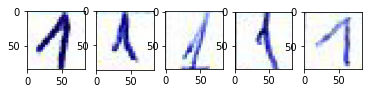

In [3]:
# show the first 5 images
base_folder = 'drive/My Drive/lab3/digits/' # change this on your machine
images_names = os.listdir(base_folder) 
num_cols = 5
for i in range(num_cols):    
    im = cv.imread(os.path.join(base_folder, images_names[i]))
    im = im[:, :, [2, 1, 0]]
    im = im[10:-15, 10:-15] 
    plt.subplot(1, num_cols, i + 1)
    plt.imshow(im)
plt.show()

(5847, 4132, 3)


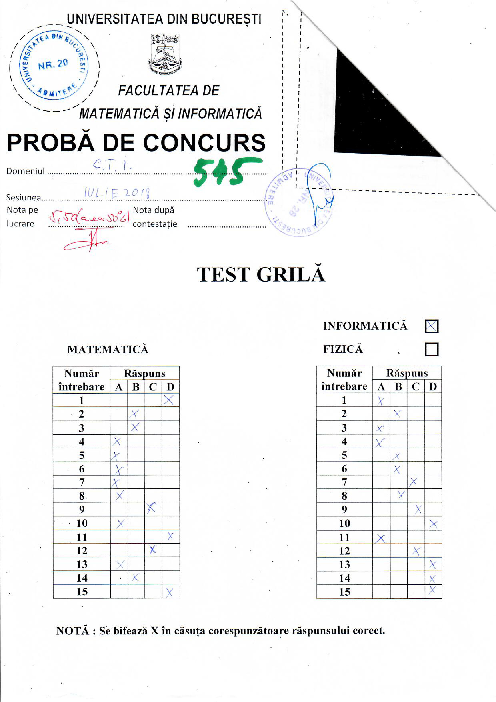

In [4]:
# we have 149 digits out of 150 images. 
# Why 149 digits and not 150?
# look at image_92.jpg
image = cv.imread('drive/My Drive/lab3/image_92.jpg')
print(image.shape)
cv2_imshow(cv.resize(image, (0, 0), fx=0.12, fy=0.12))
# What is it written in the box?

In [ ]:
# create the training set:
# images contain examples of digits (from the 149 images provided)
# labels contain labels (1, 2, 3 or 4)
num_images = len(images_names)
image_size = (32, 32)
images = []
labels = []
for image_name in images_names:
    im = cv.imread(os.path.join(base_folder, image_name))  
    im = cv.resize(im, image_size)
    im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    images.append(im)   
    label = int(image_name[0])
    labels.append(label)
images = np.array(images)
labels = np.array(labels) 

In [6]:
print('The distribution of the digits is:', np.bincount(labels)[1:])

The distribution of the digits is: [41 38 38 32]


In [8]:
train_images, test_images, train_labels, test_labels  = train_test_split(images, labels, test_size=0.2, random_state=15)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(119, 32, 32)
(119,)
(30, 32, 32)
(30,)


In [ ]:
def normalize_data(train_data, test_data, type='l2'):
    scaler = None  
    if type == 'l1':
        scaler = preprocessing.Normalizer(norm='l1') 
    elif type == 'l2':
        scaler = preprocessing.Normalizer(norm='l2')

    if scaler is not None:
        scaler.fit(train_data)
        scaled_train_data = scaler.transform(train_data)
        scaled_test_data = scaler.transform(test_data) 
        return (scaled_train_data, scaled_test_data)
    else:
        print("No scaling was performed. Raw data is returned.")
        return (train_data, test_data)

In [9]:
# apply svm on raw pixels
train_features = train_images.copy().reshape([-1, image_size[0] * image_size[1]])
print(train_features.shape)
test_features = test_images.copy().reshape([-1, image_size[0] * image_size[1]])
print(test_features.shape)
train_features, test_features = normalize_data(train_features, test_features, 'l2')

(119, 1024)
(30, 1024)


In [12]:
svm_model = svm.SVC(C=100, kernel='linear')
svm_model.fit(train_features, train_labels)
print('accuracy is:', svm_model.score(test_features, test_labels))
predicted_labels = svm_model.predict(test_features)
print('confusion matrix is:')
print(confusion_matrix(test_labels, predicted_labels)) 

accuracy is: 0.9
confusion matrix is:
[[5 0 0 0]
 [1 9 0 0]
 [0 1 9 0]
 [1 0 0 4]]


3


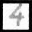

In [17]:
for i in range(len(test_labels)-1):
  if (test_labels[i]==4 and predicted_labels[i]==1):
    print(i)
    cv2_imshow(test_images[i])

In [ ]:
# other classifier that you can apply: svm on hog features, conv nets, etc